In [1]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# INPUT: file containing the data to cluster
# datafile = 'data.txt'
datafile = 'twitter_1000000.txt'

# data_ = pd.read_csv(datafile,sep=' ',header=None)
data_ = pd.read_csv(datafile,sep=' |\t|[|]',header=None,engine='python')
#print( data_ )
print('Data loaded')

Data loaded


In [2]:
# INPUT: Number of points to consider for clustering
sample_length = 500000

# Put data in array
data = np.array(data_)
data_length = np.shape(data)[0]
if sample_length<=data_length:
    data = np.array(random.sample(data.tolist(),sample_length))
else:
    print("sample_length is too large; maximum is %d."%data_length)
n = np.shape(data)[0]

<function matplotlib.pyplot.show>

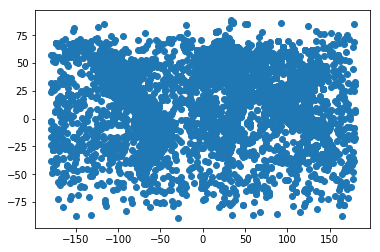

In [3]:
# Visualising the considered data
plt.scatter(data[:,1],data[:,2])
plt.show

In [4]:
# INPUT: Number of clusters
K = 7

if K > n:
    print('K is too high ! __ K>n __')
if K == 1:
    print('Are you serious ? __ K=1 __')
if K == n:
    print('Are you serious ? __ K=n __')

<function matplotlib.pyplot.show>

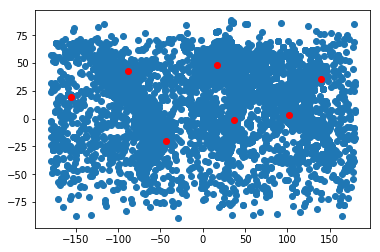

In [5]:
# Selecting initial centroids K++
centroids_cords = [] #centroids' coordinates 
centroids = [] #centroids' indexes in data array

# Select first centroid randomly 
c = random.randint(0,n-1)
centroids.append(c)
centroids_cords.append( [data[c,1] , data[c,2]] )

# Update distances column
def update(n, centroid, data, distances):
    probabilities = []
    for p in range(n):
        distances[p] = np.min((distances[p], (data[p,1]-data[centroid,1])**2 + (data[p,2]-data[centroid,2])**2 ))
    total = np.sum(distances)
    probabilities = np.array(distances) / total
    return probabilities

distances = np.full((n,),float('inf'))
while len(centroids) < K:
    c = np.random.choice(list(range(0,n)),size=1,p=update(n, c, data, distances))
    #print (c)
    centroids.append(c)
    centroids_cords.append( [data[c,1] , data[c,2]] )
    
cent_cords = np.array(centroids_cords)
plt.scatter(data[:,1],data[:,2])
plt.scatter(cent_cords[:,0],cent_cords[:,1],color='red')
plt.show


In [6]:
# Returns the order of the closest centroid (value between 0 and K-1)
#a: number of the point
#centroids_cords: array of the coords of the centroids
def closest_centroid(a,centroids_cords):
    closest = centroids_cords[0]
    d_ = (data[a,1] - closest[0])**2 + (data[a,2] - closest[1])**2
    closest = 0
    for i in range(1,K):
        d = (data[a,1] - centroids_cords[i][0])**2 + (data[a,2] - centroids_cords[i][1])**2
        if (d < d_) :
            d_ = d
            closest = i
    return closest
      

In [7]:
# basic test
for k in range(K):
    if ( not ( closest_centroid(centroids[k],centroids_cords)  == k ) ):
        print ("test failed for the %d-th centroid !" % k)
print ("success !")
        

success !


In [8]:
#print("Initial centroids: %s " % centroids)
#print("Initial centroids coords : %s" % centroids_cords)

while True:
    #FORM CLUSTERS
    
    # create empty clusters
    clusters = {}
    for i in range(K):
        clusters[i] = []
    
    # adding points to associated clusters
    for point in range(n):
        closest = closest_centroid(point,centroids_cords)
        if closest in clusters:
            clusters[closest].append(point)
        else:
            print('UnexpectedError: closest centroid not in centroids')
    
    # Recompute centroids
    new_centroids_cords = []
    for c in range(K):
        x = 0;
        y = 0;
        for i in clusters[c]:
            x += data[i,1]
            y += data[i,2]
        new_centroids_cords.append([ x/len(clusters[c]) , y/len(clusters[c]) ])
    
    if np.allclose(centroids_cords, new_centroids_cords, rtol=1e-03):
        break;
    centroids_cords = new_centroids_cords

print('TERMINATED !!!')
    

TERMINATED !!!


<function matplotlib.pyplot.show>

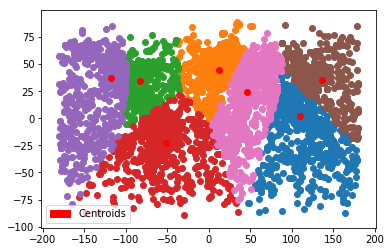

In [9]:
# Arranging data to plot 
cords = []
for cluster in range(K):
    cords.append([])
    for point in clusters[cluster]:
        cords[cluster].append([data[point,1],data[point,2]])

# Plot Clusters
for i in range(K):
        plt.scatter( np.array(cords[i])[:,0], np.array(cords[i])[:,1])

# Plot Centroids 
n_cent_cords = np.array(new_centroids_cords)
plt.scatter(n_cent_cords[:,0],n_cent_cords[:,1],color='red')
red_patch = mpatches.Patch(color='red', label='Centroids')
plt.legend(handles=[red_patch])

plt.show